# Autoencodeur 

Objectif : construire un autoencodeur à deux couches en utilisant Keras :
- l'encodeur compresse l'information dans l'espace latent
- le décodeur reconstruit l'image

## MNIST 

La base de données MNIST (Mixed National Institute of Standards and Technology), est une base de données de chiffres manuscrits. C’est une base de données standard pour le test de nouveaux algorithmes de reconnaissance de ces chiffres. Elle est composée de 60000 images d’apprentissage et 10000 images de test. Les images en noir et blanc, normalisées centrées de 28 pixels de côté.

![mnist.png](./mnist.png)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
import tensorflow.keras as tk
from tensorflow.keras.datasets import mnist

from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam

In [8]:
gpu=tensorflow.config.experimental.list_physical_devices('GPU')
tensorflow.config.experimental.set_memory_growth(gpu[0], True)

On charge ensuite les données MNIST. Les paramètres de la base sont récupérés (nombre d'exemples, de classes, taille de la rétine).

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


num_examples = x_train.shape[0] 
num_test = x_test.shape[0]
num_input = x_train.shape[1]*x_train.shape[2]
num_classes = 10

img_size = x_train.shape[1] 
img_shape = (img_size, img_size)

x_train = x_train.reshape((num_examples, num_input))
x_test  = x_test.reshape((num_test, num_input))

# normalisation
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print('Taille de la rétine : ',num_input)
print("Nombre d'exemples : ",num_examples)

y_train = tk.utils.to_categorical(y_train, num_classes)
y_test = tk.utils.to_categorical(y_test, num_classes)


Taille de la rétine :  784
Nombre d'exemples :  60000


## Autoencodeur à couches denses
On définit les paramètres de l'autoencodeur

In [10]:
'''
-------------------------------------------------------------------------
Paramètres de l'autoencodeur
-------------------------------------------------------------------------
''' 
lr = 0.1
num_iter = 50
num_epochs = 50
batch_size = 256
n_hidden_1 = 256 
n_hidden_2 = 128 

Définition de l'encodeur. Les potentiels sont des produits scalaires + biais, les fonctions d'activation des ReLU

In [12]:
#TODO
encoder = Sequential()
encoder.add(Dense(n_hidden_1, input_shape=(784,), activation='relu'))
encoder.add(Dense(n_hidden_2, activation='relu'))
encoder.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
Total params: 233856 (913.50 KB)
Trainable params: 233856 (913.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-10-28 09:56:44.449129: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:56:44.449925: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:56:44.452122: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:56:44.456338: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:56:44.460092: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:56:44.464014: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:56:44.467953: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:56:44.471691: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:56:44.472348: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:56:44

Définition du décodeur.

In [13]:
#TODO
decoder = Sequential()
decoder.add(Dense(n_hidden_1, input_shape=(128,), activation='relu'))
decoder.add(Dense(784, activation='sigmoid'))
decoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 784)               201488    
                                                                 
Total params: 234512 (916.06 KB)
Trainable params: 234512 (916.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-10-28 09:57:24.283042: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:57:24.284032: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:57:24.285311: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:57:24.294818: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:57:24.295652: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:57:24.296857: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 09:57:24.297488: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


Définition du modèle : autoencodeur à deux couches cachées

In [14]:
#TODO
model = Sequential()
model.add(encoder)
model.add(decoder)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 128)               233856    
                                                                 
 sequential_2 (Sequential)   (None, 784)               234512    
                                                                 
Total params: 468368 (1.79 MB)
Trainable params: 468368 (1.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Représentation de l'espace latent

In [7]:
#TODO

Cout et optimisation

In [16]:
adam = Adam(learning_rate=lr)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

Entraînement et test

2024-10-28 10:06:54.588869: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:06:54.592088: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:06:54.599614: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:06:54.600615: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:06:54.611155: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:06:54.612569: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:06:54.778489: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:06:54.781339: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:06:54.788376: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:06:54

Epoch 0 Précision :0.011 
 71/313 [=====>........................] - ETA: 0s

2024-10-28 10:07:00.394688: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:00.395797: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:00.404580: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:00.405556: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:00.424799: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:00.425884: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:00.430622: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:00.431540: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:00.432842: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:00

313/313 [==============================] - 1s 1ms/step


2024-10-28 10:07:00.942911: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:00.944179: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:01.040814: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:01.058823: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:01.059872: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:01.061963: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:01.071540: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:01.109288: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:01.110039: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:01

 24/313 [=>............................] - ETA: 0s 

2024-10-28 10:07:01.146915: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:01.150865: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:01.153511: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:01.178821: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


313/313 [==============================] - 1s 2ms/step


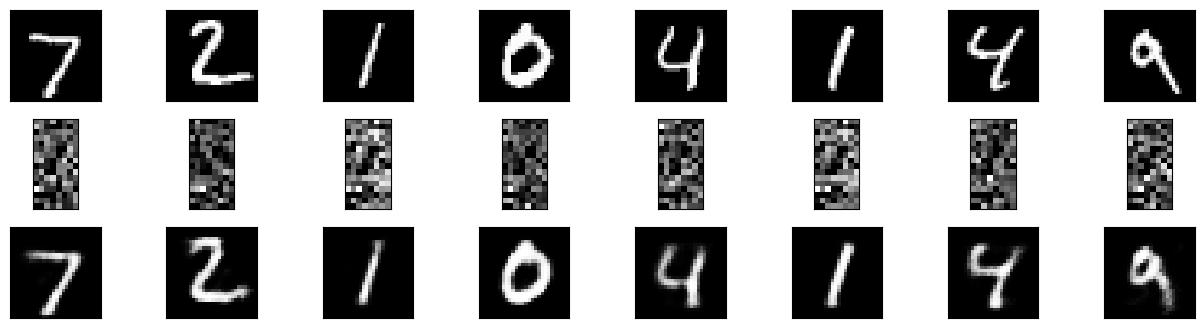

2024-10-28 10:07:03.728758: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:03.733201: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:03.736248: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:05.312694: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:05.316718: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:05.319789: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:04.819539: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:04.823603: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:04.826716: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:06

Epoch 20 Précision :0.014 
109/313 [=========>....................] - ETA: 0s

2024-10-28 10:07:31.554488: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:31.555394: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:31.560168: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:31.561110: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:31.562042: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:31.563033: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:31.568174: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:31.572271: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:31.574855: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


 48/313 [===>..........................] - ETA: 0s

2024-10-28 10:07:32.124756: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:32.125661: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:32.130415: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:32.131308: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:32.139109: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:32.140070: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:32.158175: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:32.159055: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:32.163386: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:32

313/313 [==============================] - 1s 2ms/step


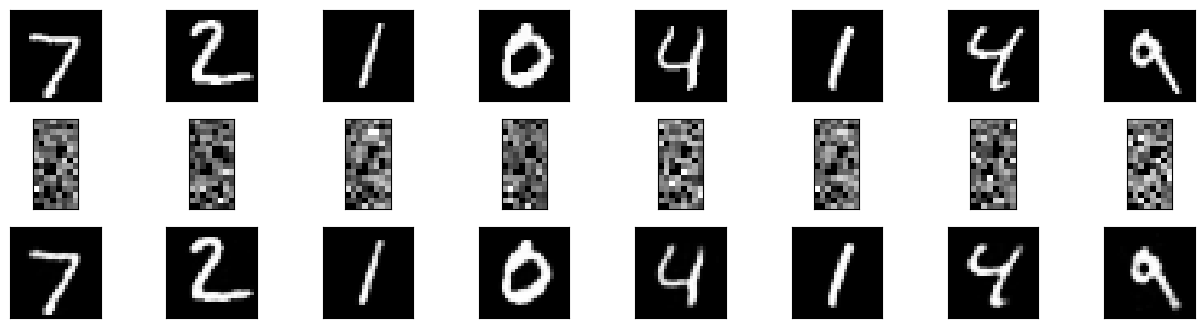

2024-10-28 10:07:34.611752: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:34.616042: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:34.619395: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:36.121369: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:36.125355: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:36.128434: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:35.656054: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:35.660487: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:35.663733: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:07:37

Epoch 40 Précision :0.015 
103/313 [========>.....................] - ETA: 0s

2024-10-28 10:08:02.021628: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:08:02.022713: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:08:02.039136: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:08:02.039934: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:08:02.044472: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:08:02.045398: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:08:02.046252: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:08:02.047211: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:08:02.052890: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:08:02

 48/313 [===>..........................] - ETA: 0s

2024-10-28 10:08:02.632785: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:08:02.633663: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:08:02.638647: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:08:02.639578: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:08:02.657524: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:08:02.658523: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:08:02.669156: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:08:02.670041: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:08:02.674604: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:08:02

313/313 [==============================] - 1s 2ms/step


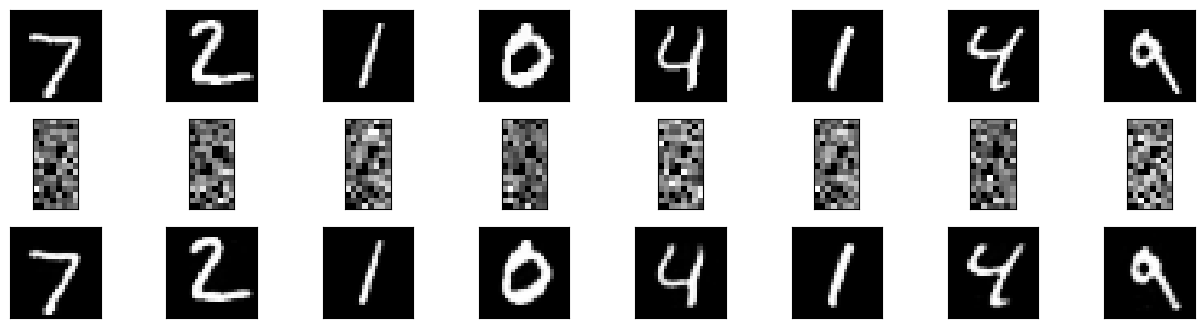

2024-10-28 10:08:05.175699: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:08:05.180040: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:08:05.183275: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:08:06.720346: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:08:06.724551: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:08:06.727793: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:08:06.332639: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:08:06.337168: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:08:06.340513: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-28 10:08:07

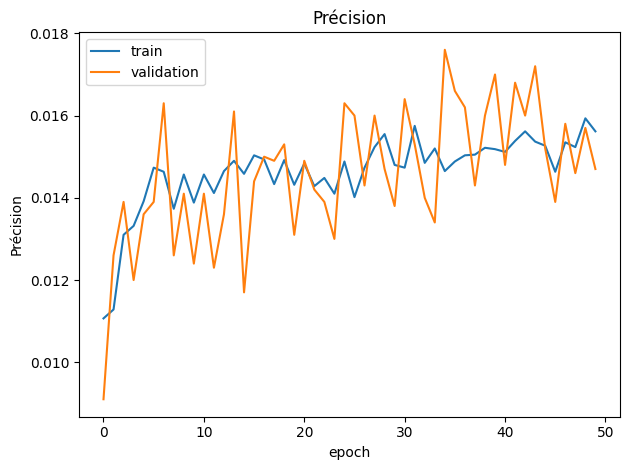

In [17]:
class myCallback(tk.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if((epoch-1) % 20==0):   
            print("Epoch {0:d} Précision :{1:5.3f} ".format(epoch-1,logs.get('acc') ))
            encoded_imgs = encoder.predict(x_test)
            decoded_imgs = model.predict(x_test)


            n = 8  
            plt.figure(figsize=(40, 4))
            for i in range(n):
                ax = plt.subplot(3, 20, i + 1)
                plt.imshow(x_test[i].reshape(28, 28))
                plt.gray()
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)

                ax = plt.subplot(3, 20, i + 1 + 20)
                plt.imshow(encoded_imgs[i].reshape(16,8))
                plt.gray()
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)

                ax = plt.subplot(3, 20, 2*20 +i+ 1)
                plt.imshow(decoded_imgs[i].reshape(28, 28))
                plt.gray()
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)

            plt.show()

            
callbacks = myCallback()

hist = model.fit(x_train, x_train,epochs=num_epochs,
                batch_size=batch_size,shuffle=True,verbose=0,
                validation_data=(x_test, x_test),callbacks=[callbacks])

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Précision')
plt.ylabel('Précision')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.tight_layout()